In [2]:
from HW3 import bs
import numpy as np
import matplotlib.pyplot as plt

# Part One Test

In [3]:
S = 100  
K = 50
q = 0
sigma = 0.5
r = 0.05
T = 1  
option_type = "call"

option = bs(S, K, r, q, sigma, T, option_type)
option.price()

53.45788111190697

# Bisection Method

In [4]:
print(f"Bisection: {option.bisection(53.45788111190697)}")

Bisection: 0.49999999285489316


# Newton's Method

In [5]:
print(f"Newton: {option.newton(53.45788111190697)}")

Newton: 0.5


# Part Two Test

# SVI

In [6]:
KS = np.linspace(50, 150, 50)
print(f"option.SVI:\n{option.SVI(0.05, 0.2, 0.2, 50, 10, KS)}\n")

option.SVI:
[1.43178211 1.47406143 1.54059986 1.62479926 1.71997222 1.82087826
 1.92397464 2.02707077 2.12889398 2.22874896 2.32628966 2.42137672
 2.51399082 2.60418062 2.69203163 2.77764771 2.86114001 2.94262056
 3.02219856 3.09997839 3.1760586  3.25053154 3.32348337 3.39499419
 3.46513843 3.53398513 3.6015984  3.66803777 3.73335854 3.79761216
 3.86084652 3.92310627 3.98443311 4.04486596 4.10444128 4.16319322
 4.22115382 4.27835316 4.33481957 4.39057968 4.44565862 4.50008012
 4.55386659 4.60703923 4.65961811 4.71162226 4.76306976 4.81397774
 4.86436253 4.91423964]



# Error

In [10]:
implied_volatility_data = np.array([0.88, 0.90, 0.78, 0.75, 0.77,
                                    0.77, 0.66, 0.55, 0.61, 0.48,
                                    0.40, 0.53, 0.531, 0.408, 0.35,
                                    0.41, 0.385, 0.3, 0.385, 0.3,
                                    0.377, 0.3, 0.3, 0.332 , 0.3,
                                    0.3377, 0.3, 0.398, 0.372, 0.355,
                                    0.303, 0.372, 0.3, 0.339, 0.393,
                                    0.468, 0.406, 0.463, 0.448, 0.513,
                                    0.554, 0.606, 0.607, 0.66, 0.712,
                                    0.638, 0.744, 0.895, 0.853, 0.856])


error = option.error(0.05, 0.2, 0.2, 50, 10, KS, implied_volatility_data)
print(f"option.error:{error}")

option.error:9.303840107053954


# Minimize

In [11]:
minimization_sample = option.mini(0.05, 0.2, 0.2, 50, 10, KS, implied_volatility_data)
a = minimization_sample[0]
print(f"a:{a}")
b = minimization_sample[1]
print(f"b:{b}")
p = minimization_sample[2]
print(f"p:{p}")
m = minimization_sample[3]
print(f"m:{m}")
sig = minimization_sample[4]
print(f"sigma:{sig}")


option.SVI(a ,b, p, m, sig, KS)

a:-5.039073634856036
b:0.09968758625691732
p:-0.7065285846520608
m:23.250258789196447
sigma:72.61978729169721


array([0.8897686 , 0.84888735, 0.80877935, 0.76947847, 0.73102181,
       0.69345081, 0.65681248, 0.62116107, 0.58655992, 0.55308373,
       0.52082129, 0.48987854, 0.46038212, 0.43248294, 0.4063597 ,
       0.38222128, 0.3603069 , 0.34088218, 0.3242287 , 0.31062516,
       0.30031961, 0.29349558, 0.29023938, 0.29051819, 0.2941773 ,
       0.30095799, 0.31053013, 0.32252944, 0.33659026, 0.35236891,
       0.36955702, 0.38788678, 0.40713075, 0.42709868, 0.44763292,
       0.46860359, 0.48990401, 0.5114467 , 0.53315988, 0.55498466,
       0.57687264, 0.59878404, 0.62068611, 0.64255188, 0.66435913,
       0.68608959, 0.70772821, 0.72926268, 0.75068293, 0.77198076])

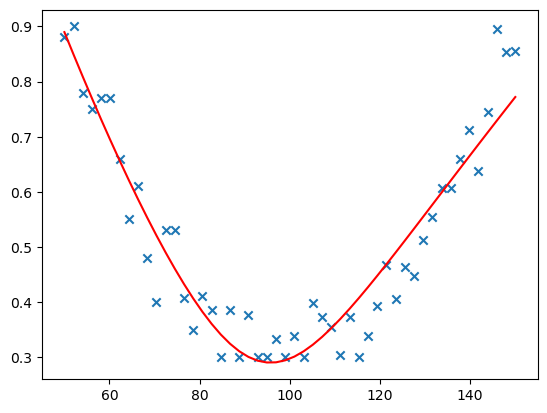

In [12]:
plt.scatter(KS, implied_volatility_data, marker = "x")
plt.plot(KS, option.SVI(a ,b, p, m, sig, KS), color = "red")
plt.show()